In [ ]:
import numpy as np

In [ ]:
def softmax(x):
    return(np.exp(x)/np.exp(x).sum())

In [ ]:
def softmax_comp(x):
    return(np.exp(-x)/np.exp(-x).sum())

In [ ]:
array_small = np.array([2, 11, 7])
array_large = np.array([0,100, 3000])


In [ ]:
softmax_comp(array_large)

array([1.00000000e+00, 3.72007598e-44, 0.00000000e+00])

In [ ]:
data = [["FDR", "PC", 0.2593],["FDR", "GES", 0.3793],["FDR", "LinGAM", 0.3333],["FDR", "No Tears", 0.1071], ["FDR", "CRL", 0.2143],["FDR", "CORL", 0], 
        ["TPR", "PC", 0.7407],["TPR", "GES", 0.6667],["TPR", "LinGAM", 0.7407],["TPR", "No Tears", 0.9259], ["TPR", "CRL", 0.8148],["TPR", "CORL", 1],
        ["SDH", "PC", 12],["SDH", "GES", 15],["SDH", "LinGAM", 13],["SDH", "No Tears",4], ["SDH", "CRL", 10],["SDH", "CORL", 0]]

In [ ]:
import pandas as pd

df = pd.DataFrame(data, columns=["Metrics", "Algorithm", "Values"])

In [ ]:
sc = softmax_comp(df[df["Metrics"]=="SDH"]["Values"])

In [ ]:
df.groupby("Algorithm").head()

,Metrics,Algorithm,Values
0,FDR,PC,0.2593
1,FDR,GES,0.3793
2,FDR,LinGAM,0.3333
3,FDR,No Tears,0.1071
4,FDR,CRL,0.2143
5,FDR,CORL,0.0000
6,TPR,PC,0.7407
7,TPR,GES,0.6667
8,TPR,LinGAM,0.7407
9,TPR,No Tears,0.9259


In [ ]:
sc

12    6.033381e-06
13    3.003843e-07
14    2.219557e-06
15    1.798525e-02
16    4.458099e-05
17    9.819616e-01
Name: Values, dtype: float64

In [ ]:
def metricNew(lambda1, lambda2, TPR, FDR, softComp_sdh):
    print("Denominator", 1.0*pow(lambda2*(0), softComp_sdh))
    print("Numerator",pow(lambda1*TPR, 1-softComp_sdh))
    return pow(lambda1*TPR, 1-softComp_sdh)/(1.0*pow(lambda2*(FDR+0.001), softComp_sdh))


In [ ]:
df

,Metrics,Algorithm,Values
0,FDR,PC,0.2593
1,FDR,GES,0.3793
2,FDR,LinGAM,0.3333
3,FDR,No Tears,0.1071
4,FDR,CRL,0.2143
5,FDR,CORL,0.0000
6,TPR,PC,0.7407
7,TPR,GES,0.6667
8,TPR,LinGAM,0.7407
9,TPR,No Tears,0.9259


In [ ]:
def findMetric(algo, metric):
    new_df = df[df["Algorithm"]==algo]
    return new_df[new_df["Metrics"] == metric]["Values"]

In [ ]:
findMetric("PC", "FDR").values[0]

0.2593

In [ ]:
sc.values[0]

6.0333806633370255e-06

In [ ]:
PC_metric = metricNew(1,1,findMetric("PC", "TPR").values[0],findMetric("PC", "FDR").values[0], sc.values[0])

Denominator 0.0
Numerator 0.7407013413919453


In [ ]:
GES_metric = metricNew(1,1,findMetric("GES", "TPR").values[0],findMetric("GES", "FDR").values[0], sc.values[1])

Denominator 0.0
Numerator 0.6667000811909631


In [ ]:
LinGAM_metric = metricNew(1,1,findMetric("LinGAM", "TPR").values[0],findMetric("LinGAM", "FDR").values[0], sc.values[2])

Denominator 0.0
Numerator 0.7407004934702368


In [ ]:
No_Tears_metric = metricNew(1,1,findMetric("No Tears", "TPR").values[0],findMetric("No Tears", "FDR").values[0], sc.values[3])

Denominator 0.0
Numerator 0.9271829516532883


In [ ]:
CRL_metric = metricNew(1,1,findMetric("CRL", "TPR").values[0],findMetric("CRL", "FDR").values[0], sc.values[4])

Denominator 0.0
Numerator 0.8148074397673231


In [ ]:
CORL_metric = metricNew(1,1,findMetric("CORL", "TPR").values[0],findMetric("CORL", "FDR").values[0], sc.values[5])

Denominator 0.0
Numerator 1.0


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
1.0/1.0*0.0


0.0

In [ ]:
CORL_metric

882.8457572504923

In [ ]:
df["Algorithm"]

0           PC
1          GES
2       LinGAM
3     No Tears
4          CRL
5         CORL
6           PC
7          GES
8       LinGAM
9     No Tears
10         CRL
11        CORL
12          PC
13         GES
14      LinGAM
15    No Tears
16         CRL
17        CORL
Name: Algorithm, dtype: object

Text(0, 0.5, 'Proposed Metric')

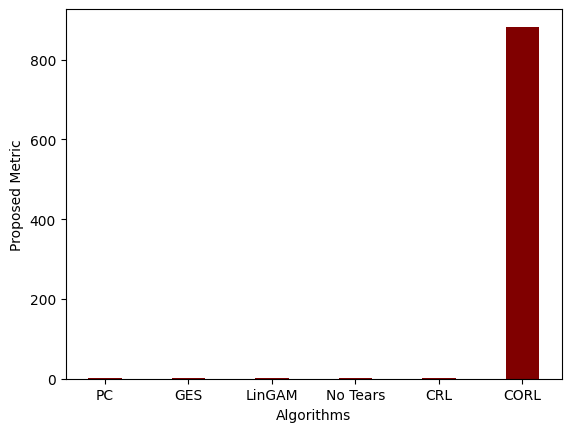

In [ ]:
plt.bar(["PC", "GES", "LinGAM", "No Tears","CRL", "CORL"], [PC_metric,GES_metric,LinGAM_metric,No_Tears_metric,CRL_metric,CORL_metric], color ='maroon',
        width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Proposed Metric")

Text(0, 0.5, 'Proposed Metric')

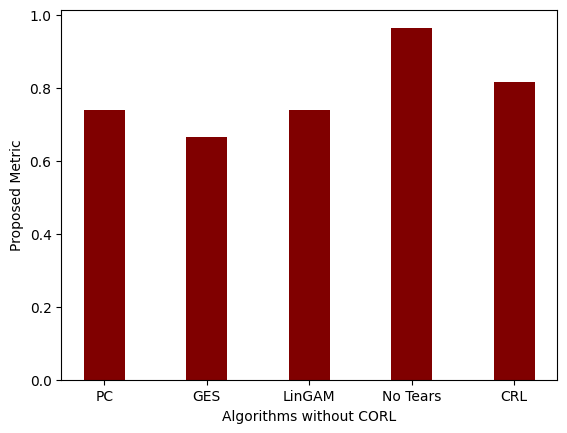

In [ ]:
plt.bar(["PC", "GES", "LinGAM", "No Tears","CRL"], [PC_metric,GES_metric,LinGAM_metric,No_Tears_metric,CRL_metric], color ='maroon',
        width = 0.4)
plt.xlabel("Algorithms without CORL")
plt.ylabel("Proposed Metric")